In [1]:
# Distribuição de Poisson
#
# O Y (a variável de interesse) tem a distribuição semelhante a curva de Poisson
# Cross validation => Validação cruzada

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

file = 'datasets/comptagesvelo2015.csv'
df = pd.read_csv(file)
df

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,11/11/2015,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
315,12/11/2015,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
316,13/11/2015,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258
317,14/11/2015,00:00,979,759,978,322,NaN,1112,290,310,...,266.0,1061,1448,269,70,1876.0,640,805,737,73


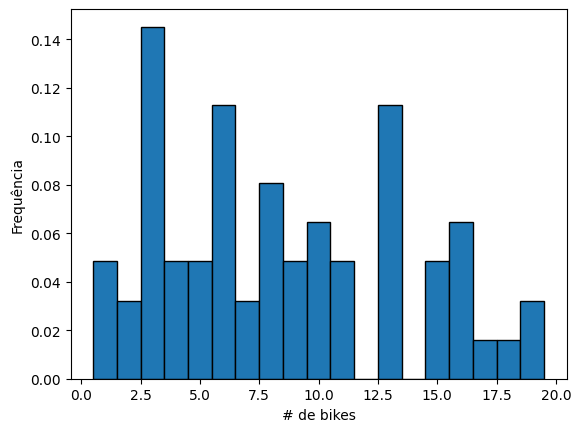

In [2]:
df1 = df[['Maisonneuve_1','Maisonneuve_2','Maisonneuve_3']]
df1 = df1.dropna(how='any')
df1['Maisonneuve_1'] = df1['Maisonneuve_1'] / 10
df1['Maisonneuve_1'] = df1['Maisonneuve_1'].astype(int)

df1['Maisonneuve_2'] = df1['Maisonneuve_2'] / 10
df1['Maisonneuve_2'] = df1['Maisonneuve_2'].astype(int)

df1['Maisonneuve_3'] = df1['Maisonneuve_3'] / 10
df1['Maisonneuve_3'] = df1['Maisonneuve_3'].astype(int)

# Maisonneuve_1: variável de interesse (Y)
# Maisonneuve_2, Maisonneuve_3: regressores escolhidos

values = df1['Maisonneuve_1'].to_numpy()
plt.hist(values, bins=range(min(values), max(values)+1), align="left", density=True, edgecolor="Black")
plt.xlabel("# de bikes")
plt.ylabel("Frequência")
plt.show()

In [3]:
model = linear_model.PoissonRegressor()
x = df1[['Maisonneuve_2','Maisonneuve_3']].to_numpy()
y = df1['Maisonneuve_1'].to_numpy()
model.fit(x, y)
print(model.score(x, y)) # R^2: 0.77

model = linear_model.LinearRegression()
model.fit(x, y)
print(model.score(x, y)) # R^2: 0.78

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)
model_poly = linear_model.LinearRegression()
model_poly.fit(x_poly, y)
score_polynomial = model_poly.score(x_poly, y)
print(score_polynomial)


0.7736401348506257
0.7812720870522996
0.8125831763028031


Validação cruzada:

se o R² do modelo linear for maior que o R² do Poisson e Polinomial, então Linear é o melhor modelo

se o R² do modelo Poisson for maior que o R² da Linear e Polinomial, então Poisson é o melhor modelo

se o R² do modelo polinomial for maior que o R² da Linear e Poisson e não tiver risco de overfiting, então Poisson é o melhor modelo

In [4]:
# Treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Poisson
model_poisson = linear_model.PoissonRegressor()
model_poisson.fit(x_train, y_train)
score_poisson_train = model_poisson.score(x_train, y_train)
score_poisson_test = model_poisson.score(x_test, y_test)

# Regressão linear
model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)
score_linear_train = model_linear.score(x_train, y_train)
score_linear_test = model_linear.score(x_test, y_test)

# Regressão Polinomial
poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)
model_poly = linear_model.LinearRegression()
model_poly.fit(x_poly_train, y_train)
score_poly_train = model_poly.score(x_poly_train, y_train)
score_poly_test = model_poly.score(x_poly_test, y_test)

print("R-quadrado de Poisson:", score_poisson_train, "R-quadrado de Teste:", score_poisson_test)
print("R-quadrado da Regressão Linear:", score_linear_train, "R-quadrado de Teste:", score_linear_test)
print("R-quadrado da Regressão Polinomial:", score_poly_train, "R-quadrado de Teste:", score_poly_test)


R-quadrado de Poisson: 0.777623752982405 R-quadrado de Teste: 0.6871525954185576
R-quadrado da Regressão Linear: 0.8003398387401898 R-quadrado de Teste: 0.6143316317315979
R-quadrado da Regressão Polinomial: 0.8313277991819013 R-quadrado de Teste: 0.5290311719961553


O modelo de Poisson tem um R² de treino de 0.7776 e um R² de teste de 0.6872. O modelo tem um desempenho bom nos modelos de treino e teste

O modelo de Regressão Linear tem um R² de treino de 0.8003 e um R² de teste de 0.6143. O modelo se ajusta bem aos dados de treino, mas seu desempenho nos dados de teste é um pouco pior do que o modelo de Poisson.

O modelo de Regressão Polinomial tem um R² de treino de 0.8313, o maior entre os três modelos. Mas seu R² de teste é de apenas 0.5290, o que é bem menor do que o R² de treino. Isso pode indicar um overfitting do modelo aos dados de treino.

Com base nesses resultados, o modelo de Poisson pode até ser a melhor escolha, pois tem um bom equilíbrio entre o desempenho de treino e teste